# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | noyabrsk
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | tazovsky
Processing Record 4 of Set 1 | gudauta
Processing Record 5 of Set 1 | viedma
Processing Record 6 of Set 1 | itambacuri
Processing Record 7 of Set 1 | dhidhdhoo
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | alice springs
Processing Record 10 of Set 1 | utrik
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | iskateley
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | sao vicente
Processing Record 17 of Set 1 | yanda bayo
Processing Record 18 of Set 1 | antsiranana
Processing Record 19 of Set 1 | tinajo
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | ust-nera
Processing Record 22 of Set 1 | port-a

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,noyabrsk,63.1994,75.4507,0.39,94,100,3.79,RU,1682097563
1,yellowknife,62.4560,-114.3525,2.29,64,75,5.66,CA,1682097563
2,tazovsky,67.4667,78.7000,-2.18,96,100,4.77,RU,1682097564
3,gudauta,43.1055,40.6207,11.69,83,46,0.99,GE,1682097564
4,viedma,-40.8135,-62.9967,22.02,33,100,9.30,AR,1682097564


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,noyabrsk,63.1994,75.4507,0.39,94,100,3.79,RU,1682097563
1,yellowknife,62.4560,-114.3525,2.29,64,75,5.66,CA,1682097563
2,tazovsky,67.4667,78.7000,-2.18,96,100,4.77,RU,1682097564
3,gudauta,43.1055,40.6207,11.69,83,46,0.99,GE,1682097564
4,viedma,-40.8135,-62.9967,22.02,33,100,9.30,AR,1682097564


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

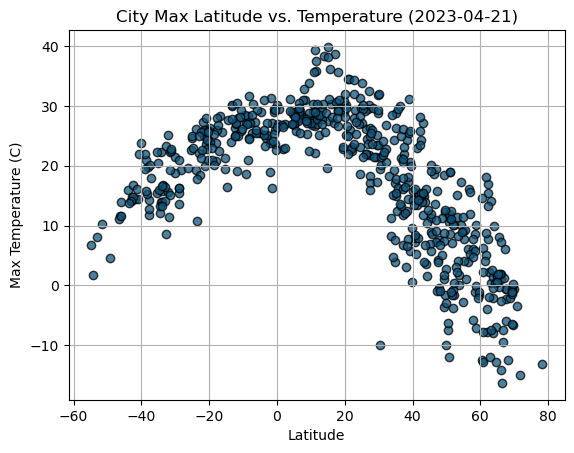

In [22]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(latitude, temperature, color='#11557c', alpha=0.75, edgecolors='black')
plt.title("City Max Latitude vs. Temperature (2023-04-21)")
plt. xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

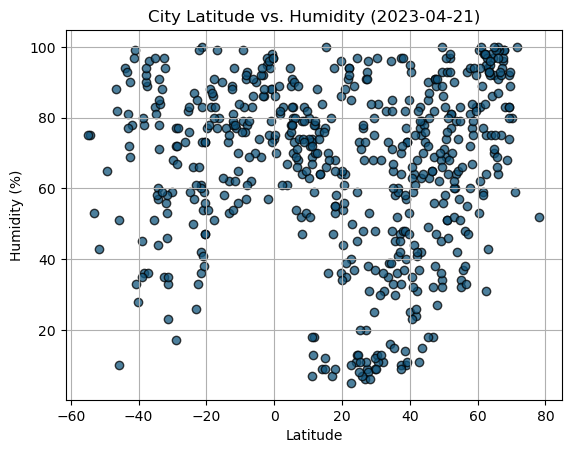

In [23]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(latitude, humidity, color='#11557c', alpha=0.75, edgecolors='black')
plt.title("City Latitude vs. Humidity (2023-04-21)")
plt. xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

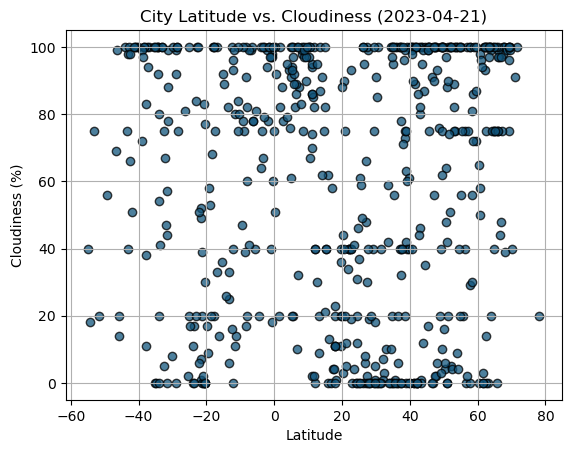

In [24]:
# Build the scatter plots for latitude vs. humidity
cloudiness = city_data_df['Cloudiness']
                          
# Incorporate the other graph properties
plt.scatter(latitude, cloudiness, color='#11557c', alpha=0.75, edgecolors='black')
plt.title("City Latitude vs. Cloudiness (2023-04-21)")
plt. xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

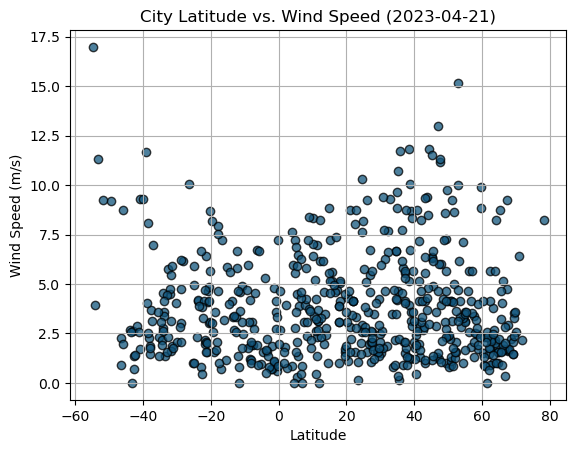

In [25]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
                          
# Incorporate the other graph properties
plt.scatter(latitude, wind_speed, color='#11557c', alpha=0.75, edgecolors='black')
plt.title("City Latitude vs. Wind Speed (2023-04-21)")
plt. xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def linear_regress_values(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    return regress_values

def linear_regress_line(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return line_eq

def linear_regress_r(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    return rvalue

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,noyabrsk,63.1994,75.4507,0.39,94,100,3.79,RU,1682097563
1,yellowknife,62.4560,-114.3525,2.29,64,75,5.66,CA,1682097563
2,tazovsky,67.4667,78.7000,-2.18,96,100,4.77,RU,1682097564
3,gudauta,43.1055,40.6207,11.69,83,46,0.99,GE,1682097564
6,dhidhdhoo,6.8833,73.1000,29.13,68,32,0.87,MV,1682097564


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,viedma,-40.8135,-62.9967,22.02,33,100,9.30,AR,1682097564
5,itambacuri,-18.0311,-41.6850,20.83,86,100,2.05,BR,1682097564
7,waitangi,-43.9535,-176.5597,16.01,94,100,2.68,NZ,1682097564
8,alice springs,-23.7000,133.8833,10.75,87,17,4.12,AU,1682097565
10,invercargill,-46.4000,168.3500,11.68,82,99,0.89,NZ,1682097565


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7136422083908149


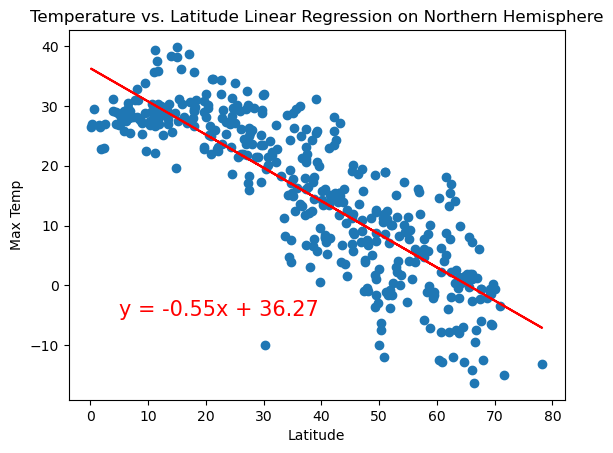

In [40]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_temp = northern_hemi_df['Max Temp']
plt.scatter(north_lat, north_temp)
plt.plot(north_lat, linear_regress_values(north_lat, north_temp), "r")
plt.annotate(linear_regress_line(north_lat, north_temp), (5,-5), fontsize=15,color="red")
plt.title('Temperature vs. Latitude Linear Regression on Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {linear_regress_r(north_lat, north_temp)**2}")
plt.show()

The r-squared is: 0.6067816133051424


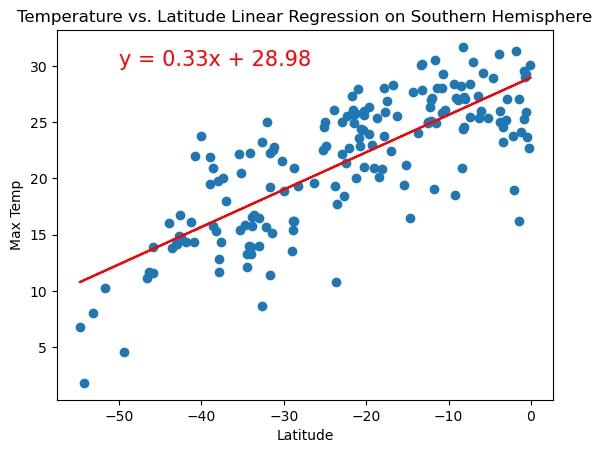

In [41]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_temp = southern_hemi_df['Max Temp']
plt.scatter(south_lat, south_temp)
plt.plot(south_lat, linear_regress_values(south_lat, south_temp), "r")
plt.annotate(linear_regress_line(south_lat, south_temp), (-50,30), fontsize=15,color="red")
plt.title('Temperature vs. Latitude Linear Regression on Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {linear_regress_r(south_lat, south_temp)**2}")
plt.show()

**Discussion about the linear relationship:** In the southern hemisphere we have a positive slope for our regression line as opposed to the northern hemisphere which has a postive slope. This means that as latitude increases so does the temperature. This makes sense because increasing latitude means you are getting closer to the equator. We also have an r-squared value of 0.60 which means that our line has a positive correlation. The r-squared value gives us even more reason to believe that as you approach the equator the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04132103033766185


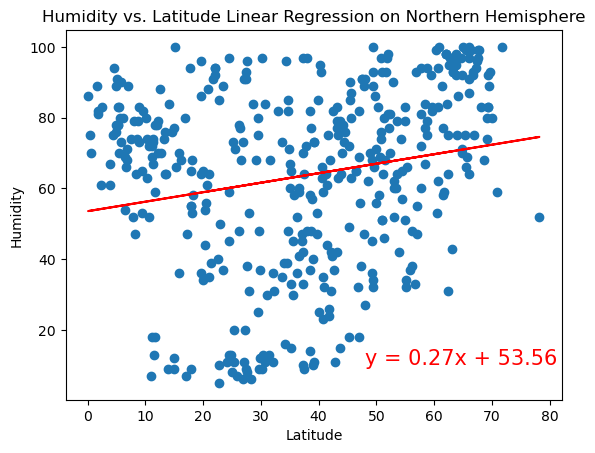

In [44]:
# Northern Hemisphere
north_hum = northern_hemi_df['Humidity']
plt.scatter(north_lat, north_hum)
plt.plot(north_lat, linear_regress_values(north_lat, north_hum), "r")
plt.annotate(linear_regress_line(north_lat, north_hum), (48,10), fontsize=15,color="red")
plt.title('Humidity vs. Latitude Linear Regression on Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {linear_regress_r(north_lat, north_hum)**2}")
plt.show()

The r-squared is: 0.07773768944457951


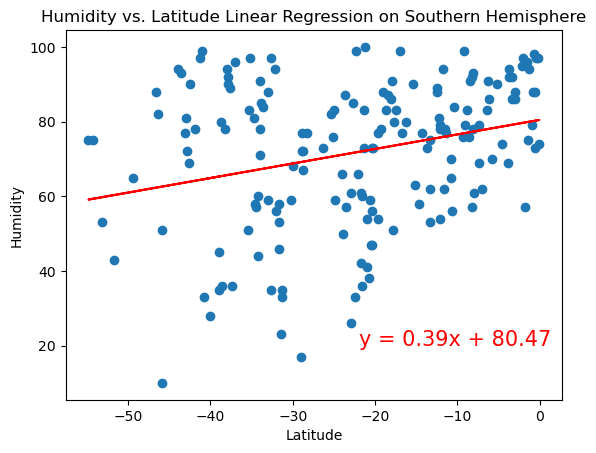

In [46]:
# Southern Hemisphere
south_hum = southern_hemi_df['Humidity']
plt.scatter(south_lat, south_hum)
plt.plot(south_lat, linear_regress_values(south_lat, south_hum), "r")
plt.annotate(linear_regress_line(south_lat, south_hum), (-22,20), fontsize=15,color="red")
plt.title('Humidity vs. Latitude Linear Regression on Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {linear_regress_r(south_lat, south_hum)**2}")
plt.show()

**Discussion about the linear relationship:** In both the northern and southern hemisphere we have small r-squared values. This means that there really isn't a strong correlation between humidity and latitude. We should expect this because regions with humid climates are affected by water and water doesn't depend on latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.01164400994398473


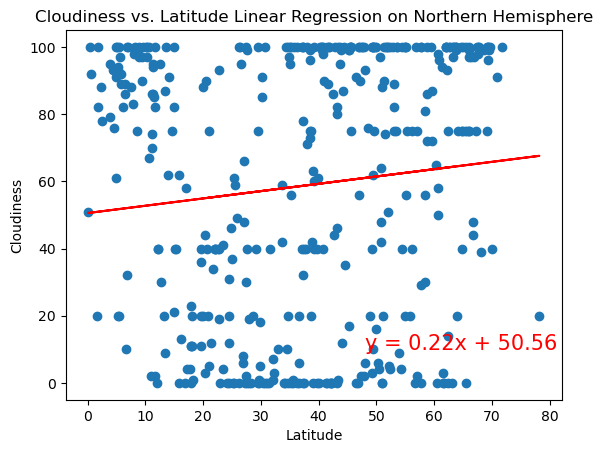

In [47]:
# Northern Hemisphere
north_cloud = northern_hemi_df['Cloudiness']
plt.scatter(north_lat, north_cloud)
plt.plot(north_lat, linear_regress_values(north_lat, north_cloud), "r")
plt.annotate(linear_regress_line(north_lat, north_cloud), (48,10), fontsize=15,color="red")
plt.title('Cloudiness vs. Latitude Linear Regression on Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {linear_regress_r(north_lat, north_cloud)**2}")
plt.show()

The r-squared is: 0.0018697931788978336


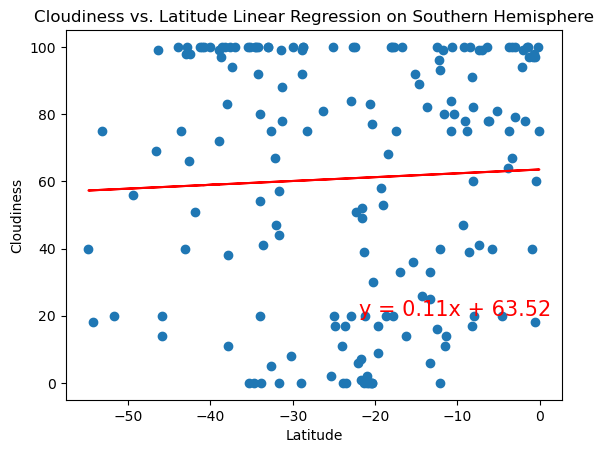

In [50]:
# Southern Hemisphere
south_cloud = southern_hemi_df['Cloudiness']
plt.scatter(south_lat, south_cloud)
plt.plot(south_lat, linear_regress_values(south_lat, south_cloud), "r")
plt.annotate(linear_regress_line(south_lat, south_cloud), (-22,20), fontsize=15,color="red")
plt.title('Cloudiness vs. Latitude Linear Regression on Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {linear_regress_r(south_lat, south_cloud)**2}")
plt.show()

**Discussion about the linear relationship:** Just like with humidity we have small r-squared values for both northern and southern hemispheres. The data in both scatter plots is very spread out meaning latitude doesn't affect the cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.003072763187571091


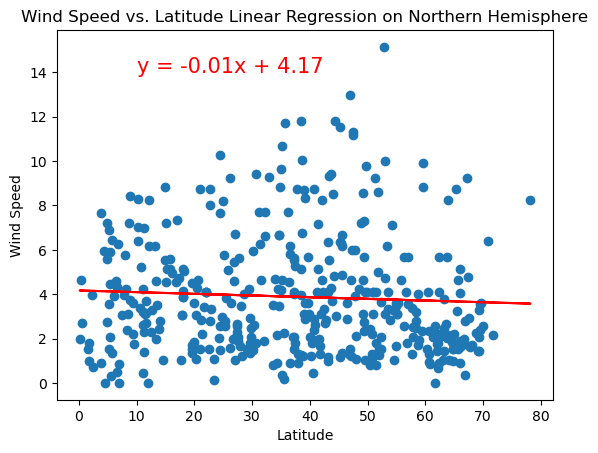

In [49]:
# Northern Hemisphere
north_ws = northern_hemi_df['Wind Speed']
plt.scatter(north_lat, north_ws)
plt.plot(north_lat, linear_regress_values(north_lat, north_ws), "r")
plt.annotate(linear_regress_line(north_lat, north_ws), (10,14), fontsize=15,color="red")
plt.title('Wind Speed vs. Latitude Linear Regression on Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {linear_regress_r(north_lat, north_ws)**2}")
plt.show()

The r-squared is: 0.07399006831928119


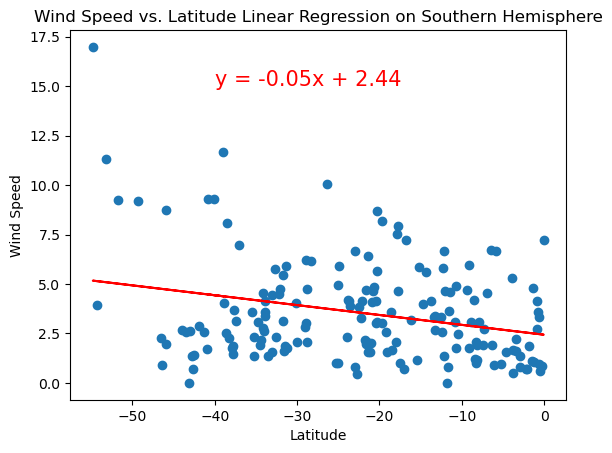

In [52]:
# Southern Hemisphere
south_ws = southern_hemi_df['Wind Speed']
plt.scatter(south_lat, south_ws)
plt.plot(south_lat, linear_regress_values(south_lat, south_ws), "r")
plt.annotate(linear_regress_line(south_lat, south_ws), (-40,15), fontsize=15,color="red")
plt.title('Wind Speed vs. Latitude Linear Regression on Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {linear_regress_r(south_lat, south_ws)**2}")
plt.show()

**Discussion about the linear relationship:** Again, small r-squared values for wind speed and latitude in both hemispheres. The data shows that wind speed doesn't depend on latitude.